# Gerekli Kütüphanelerin İçe Aktarılması
Pandas ve diğer gerekli kütüphanelerin içe aktarılması.

In [ ]:
%pip install pandas numpy matplotlib seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Grafiklerin not defterinde görüntülenmesi için
%matplotlib inline

# Veri Kümesinin Yüklenmesi
retail_transactions_dataset veri kümesinin Pandas ile yüklenmesi.

In [5]:
# Veri Kümesinin Yüklenmesi
dataset_path = 'retail_transactions_dataset.csv'  # Veri kümesinin dosya yolu
df = pd.read_csv(dataset_path)  # Veri kümesini Pandas ile yükleme
# İlk birkaç satırı görüntüleme
df.head()

,Transaction_ID,Date,Customer_Name,Product,Total_Items,Total_Cost,Payment_Method,City,Store_Type,Discount_Applied,Customer_Category,Season,Promotion
0,1000000000,2022-01-21 06:27:29,Stacey Price,"['Ketchup', 'Shaving Cream', 'Light Bulbs']",3,71.65,Mobile Payment,Los Angeles,Warehouse Club,True,Homemaker,Winter,NaN
1,1000000001,2023-03-01 13:01:21,Michelle Carlson,"['Ice Cream', 'Milk', 'Olive Oil', 'Bread', 'P...",2,25.93,Cash,San Francisco,Specialty Store,True,Professional,Fall,BOGO (Buy One Get One)
2,1000000002,2024-03-21 15:37:04,Lisa Graves,['Spinach'],6,41.49,Credit Card,Houston,Department Store,True,Professional,Winter,NaN
3,1000000003,2020-10-31 09:59:47,Mrs. Patricia May,"['Tissues', 'Mustard']",1,39.34,Mobile Payment,Chicago,Pharmacy,True,Homemaker,Spring,NaN
4,1000000004,2020-12-10 00:59:59,Susan Mitchell,['Dish Soap'],10,16.42,Debit Card,Houston,Specialty Store,False,Young Adult,Winter,Discount on Selected Items


# Veri Kümesi Hakkında Genel Bilgiler
Veri kümesinin genel bilgilerini görüntüleme (örneğin, ilk birkaç satır, veri türleri, özet istatistikler).

In [6]:
# Veri türlerini görüntüleme
df.dtypes

# Özet istatistikleri görüntüleme
df.describe()

# Veri kümesinin genel bilgilerini görüntüleme
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 13 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Transaction_ID     1000000 non-null  int64  
 1   Date               1000000 non-null  object 
 2   Customer_Name      1000000 non-null  object 
 3   Product            1000000 non-null  object 
 4   Total_Items        1000000 non-null  int64  
 5   Total_Cost         1000000 non-null  float64
 6   Payment_Method     1000000 non-null  object 
 7   City               1000000 non-null  object 
 8   Store_Type         1000000 non-null  object 
 9   Discount_Applied   1000000 non-null  bool   
 10  Customer_Category  1000000 non-null  object 
 11  Season             1000000 non-null  object 
 12  Promotion          666057 non-null   object 
dtypes: bool(1), float64(1), int64(2), object(9)
memory usage: 92.5+ MB


# Eksik Verilerin Analizi
Veri kümesindeki eksik verilerin tespit edilmesi ve analizi.

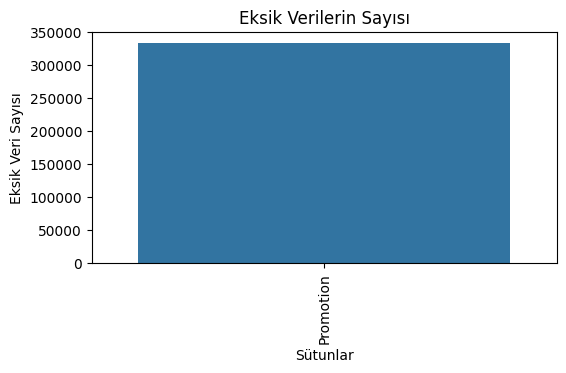

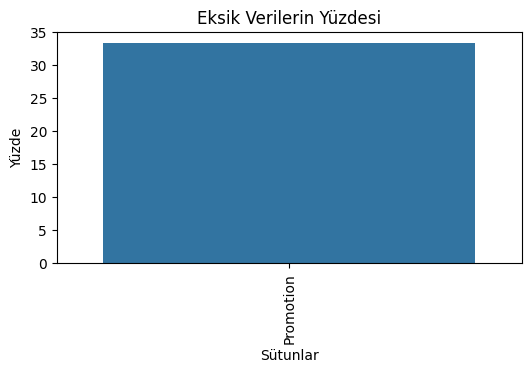

In [7]:
# Eksik Verilerin Analizi

# Eksik verilerin sayısını ve yüzdesini hesaplama
missing_values_count = df.isnull().sum()
missing_values_percentage = (missing_values_count / len(df)) * 100

# Eksik verilerin sayısını ve yüzdesini bir DataFrame olarak görüntüleme
missing_data = pd.DataFrame({'Missing Values': missing_values_count, 'Percentage': missing_values_percentage})
missing_data = missing_data[missing_data['Missing Values'] > 0]  # Sadece eksik verisi olan sütunları göster
missing_data.sort_values(by='Missing Values', ascending=False, inplace=True)

missing_data

# Eksik verilerin görselleştirilmesi
plt.figure(figsize=(6, 3))
sns.barplot(x=missing_data.index, y=missing_data['Missing Values'])
plt.xticks(rotation=90)
plt.title('Eksik Verilerin Sayısı')
plt.xlabel('Sütunlar')
plt.ylabel('Eksik Veri Sayısı')
plt.show()

# Eksik verilerin yüzdesinin görselleştirilmesi
plt.figure(figsize=(6, 3))
sns.barplot(x=missing_data.index, y=missing_data['Percentage'])
plt.xticks(rotation=90)
plt.title('Eksik Verilerin Yüzdesi')
plt.xlabel('Sütunlar')
plt.ylabel('Yüzde')
plt.show()

# Veri Kümesinin Temizlenmesi
Eksik verilerin doldurulması veya çıkarılması, veri türlerinin düzeltilmesi gibi veri temizleme işlemleri.

In [8]:
# Eksik Verilerin Doldurulması veya Çıkarılması


# Kullanılmayacak sütunları kaldırma
df_cleaned = df.drop(columns=['Customer_Name'])
df_cleaned = df_cleaned.drop(columns=['Transaction_ID'])

# Eksik verilerin olduğu satırları çıkarma
df_cleaned = df_cleaned.dropna()
# Alternatif olarak, eksik verileri belirli bir değerle doldurma (örneğin, ortalama ile)
# df.fillna(df.mean(), inplace=True)

# Veri Türlerinin Düzeltilmesi

# Tarih sütununu datetime veri türüne dönüştürme
if 'Date' in df_cleaned.columns:
    df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'])

import ast
from itertools import chain


df_cleaned['Product'] = df_cleaned['Product'].apply(ast.literal_eval)


# Daha iyi analiz için ürünleri normalize et
df_cleaned['Normalized_Products'] = df_cleaned['Product'].apply(lambda x: list(chain.from_iterable([p.split(",") for p in x])))


# toothpaste ürününü veri setinden kaldırdım çünkü veri seti sentetik bir veriseti ve toothpaste ürünü anlamsız derecede fazla
df_cleaned['Normalized_Products'] = df_cleaned['Normalized_Products'].apply(lambda products: [product for product in products if product != 'Toothpaste'])


# Kategorik sütunları category veri türüne dönüştürme
#categorical_columns = ['Product', 'Payment_Method', 'City', 'Store_Type', 'Customer_Category', 'Season', 'Promotion']
#for col in categorical_columns:
 #   if col in df_cleaned.columns:
  #      df_cleaned[col] = df_cleaned[col].astype('category')  # Kategorik sütunların isimleri



# Temizlenmiş veri kümesinin genel bilgilerini görüntüleme
df_cleaned.info()

# Temizlenmiş veri kümesinin ilk birkaç satırını görüntüleme
df_cleaned.head()

<class 'pandas.core.frame.DataFrame'>
Index: 666057 entries, 1 to 999999
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Date                 666057 non-null  datetime64[ns]
 1   Product              666057 non-null  object        
 2   Total_Items          666057 non-null  int64         
 3   Total_Cost           666057 non-null  float64       
 4   Payment_Method       666057 non-null  object        
 5   City                 666057 non-null  object        
 6   Store_Type           666057 non-null  object        
 7   Discount_Applied     666057 non-null  bool          
 8   Customer_Category    666057 non-null  object        
 9   Season               666057 non-null  object        
 10  Promotion            666057 non-null  object        
 11  Normalized_Products  666057 non-null  object        
dtypes: bool(1), datetime64[ns](1), float64(1), int64(1), object(8)
memory usage: 

,Date,Product,Total_Items,Total_Cost,Payment_Method,City,Store_Type,Discount_Applied,Customer_Category,Season,Promotion,Normalized_Products
1,2023-03-01 13:01:21,"[Ice Cream, Milk, Olive Oil, Bread, Potatoes]",2,25.93,Cash,San Francisco,Specialty Store,True,Professional,Fall,BOGO (Buy One Get One),"[Ice Cream, Milk, Olive Oil, Bread, Potatoes]"
4,2020-12-10 00:59:59,[Dish Soap],10,16.42,Debit Card,Houston,Specialty Store,False,Young Adult,Winter,Discount on Selected Items,[Dish Soap]
5,2021-10-07 12:37:26,"[Toothpaste, Chicken]",3,72.24,Cash,Houston,Supermarket,True,Retiree,Spring,Discount on Selected Items,[Chicken]
6,2023-01-08 10:40:03,"[Honey, BBQ Sauce, Soda, Olive Oil, Garden Hose]",4,5.28,Cash,Boston,Specialty Store,False,Student,Summer,Discount on Selected Items,"[Honey, BBQ Sauce, Soda, Olive Oil, Garden Hose]"
7,2020-09-03 12:39:59,"[Syrup, Trash Cans, Pancake Mix, Water, Mayonn...",5,21.77,Debit Card,Chicago,Specialty Store,False,Young Adult,Winter,Discount on Selected Items,"[Syrup, Trash Cans, Pancake Mix, Water, Mayonn..."


# Temel İstatistiksel Analizler
Veri kümesi üzerinde temel istatistiksel analizlerin yapılması (örneğin, ortalama, medyan, standart sapma).

In [9]:
general_stats = {
    "Total_Transactions": df_cleaned.shape[0],
    "Unique_Products": len(set(chain.from_iterable(df_cleaned['Normalized_Products']))),
    "Payment_Methods": df_cleaned['Payment_Method'].value_counts().to_dict(),
    "Store_Types": df_cleaned['Store_Type'].value_counts().to_dict(),
    "Cities": df_cleaned['City'].value_counts().to_dict(),
    "Seasons": df_cleaned['Season'].value_counts().to_dict(),
}

general_stats

{'Total_Transactions': 666057,
 'Unique_Products': 80,
 'Payment_Methods': {'Cash': 166777,
  'Credit Card': 166614,
  'Mobile Payment': 166561,
  'Debit Card': 166105},
 'Store_Types': {'Supermarket': 111341,
  'Pharmacy': 111290,
  'Convenience Store': 111189,
  'Warehouse Club': 111171,
  'Department Store': 110634,
  'Specialty Store': 110432},
 'Cities': {'Boston': 66982,
  'Seattle': 66892,
  'Dallas': 66851,
  'Chicago': 66773,
  'Houston': 66689,
  'New York': 66596,
  'Los Angeles': 66475,
  'San Francisco': 66386,
  'Miami': 66363,
  'Atlanta': 66050},
 'Seasons': {'Spring': 166969,
  'Winter': 166637,
  'Fall': 166485,
  'Summer': 165966}}

# Veri Görselleştirme
Veri kümesinin görselleştirilmesi için grafikler ve çizimler oluşturma.

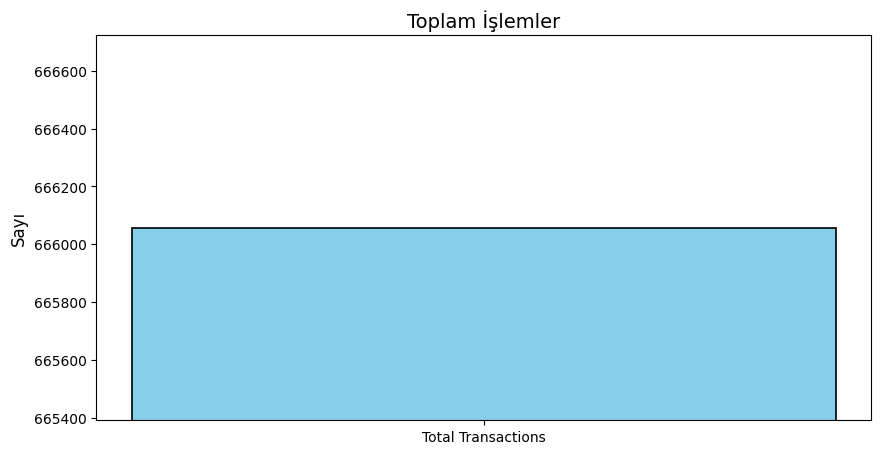

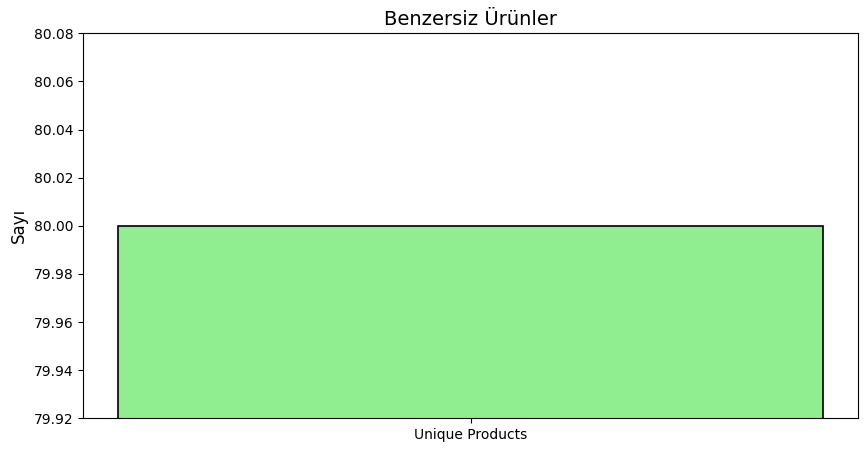

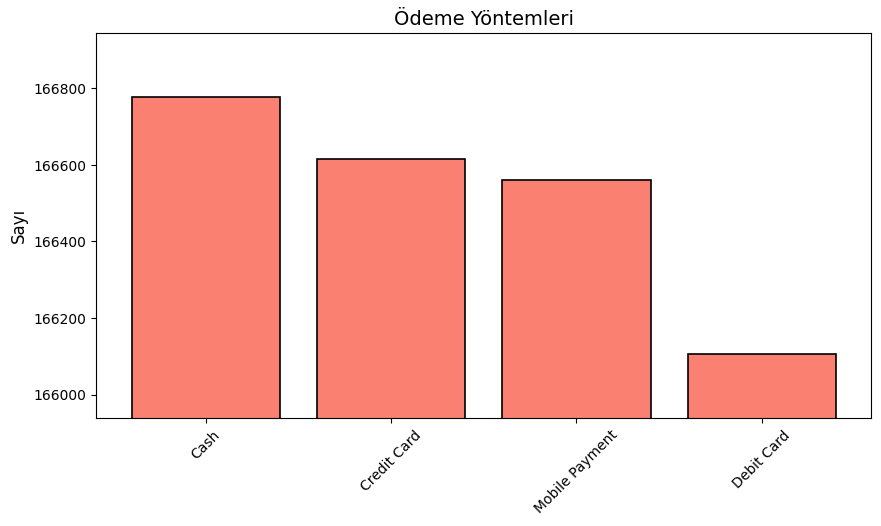

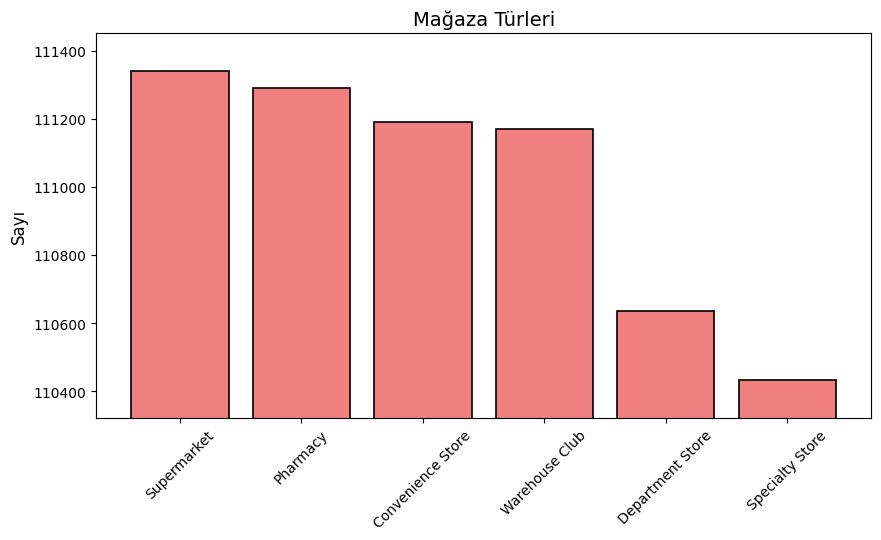

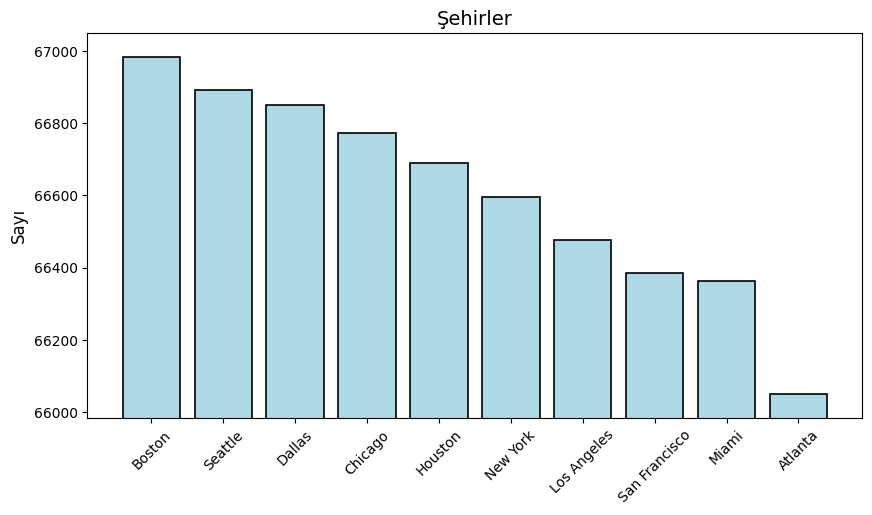

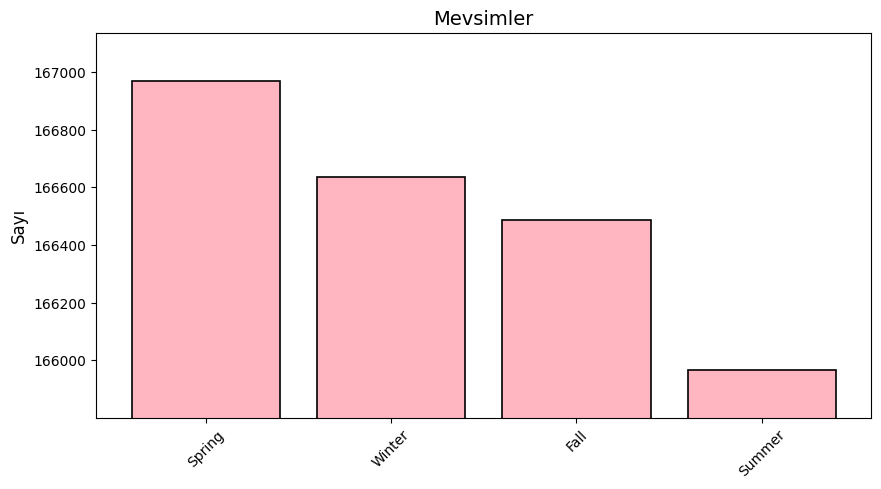

In [10]:
import matplotlib.pyplot as plt

# Toplam İşlemler Grafiği
plt.figure(figsize=(10, 5))
plt.bar(['Total Transactions'], [general_stats['Total_Transactions']], color='skyblue', edgecolor='black', linewidth=1.2)
plt.title('Toplam İşlemler', fontsize=14)
plt.ylabel('Sayı', fontsize=12)
plt.ylim(general_stats['Total_Transactions'] * 0.999, general_stats['Total_Transactions'] * 1.001)  # Y ekseni aralığını daha da daraltma
plt.show()

# Benzersiz Ürünler Grafiği
plt.figure(figsize=(10, 5))
plt.bar(['Unique Products'], [general_stats['Unique_Products']], color='lightgreen', edgecolor='black', linewidth=1.2)
plt.title('Benzersiz Ürünler', fontsize=14)
plt.ylabel('Sayı', fontsize=12)
plt.ylim(general_stats['Unique_Products'] * 0.999, general_stats['Unique_Products'] * 1.001)  # Y ekseni aralığını daha da daraltma
plt.show()

# Ödeme Yöntemleri Grafiği
plt.figure(figsize=(10, 5))
plt.bar(general_stats['Payment_Methods'].keys(), general_stats['Payment_Methods'].values(), color='salmon', edgecolor='black', linewidth=1.2)
plt.title('Ödeme Yöntemleri', fontsize=14)
plt.ylabel('Sayı', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.ylim(min(general_stats['Payment_Methods'].values()) * 0.999, max(general_stats['Payment_Methods'].values()) * 1.001)  # Y ekseni aralığını daha da daraltma
plt.show()

# Mağaza Türleri Grafiği
plt.figure(figsize=(10, 5))
plt.bar(general_stats['Store_Types'].keys(), general_stats['Store_Types'].values(), color='lightcoral', edgecolor='black', linewidth=1.2)
plt.title('Mağaza Türleri', fontsize=14)
plt.ylabel('Sayı', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.ylim(min(general_stats['Store_Types'].values()) * 0.999, max(general_stats['Store_Types'].values()) * 1.001)  # Y ekseni aralığını daha da daraltma
plt.show()

# Şehirler Grafiği
plt.figure(figsize=(10, 5))
plt.bar(general_stats['Cities'].keys(), general_stats['Cities'].values(), color='lightblue', edgecolor='black', linewidth=1.2)
plt.title('Şehirler', fontsize=14)
plt.ylabel('Sayı', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.ylim(min(general_stats['Cities'].values()) * 0.999, max(general_stats['Cities'].values()) * 1.001)  # Y ekseni aralığını daha da daraltma
plt.show()

# Mevsimler Grafiği
plt.figure(figsize=(10, 5))
plt.bar(general_stats['Seasons'].keys(), general_stats['Seasons'].values(), color='lightpink', edgecolor='black', linewidth=1.2)
plt.title('Mevsimler', fontsize=14)
plt.ylabel('Sayı', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.ylim(min(general_stats['Seasons'].values()) * 0.999, max(general_stats['Seasons'].values()) * 1.001)  # Y ekseni aralığını daha da daraltma
plt.show()

# Alınan Ürünler

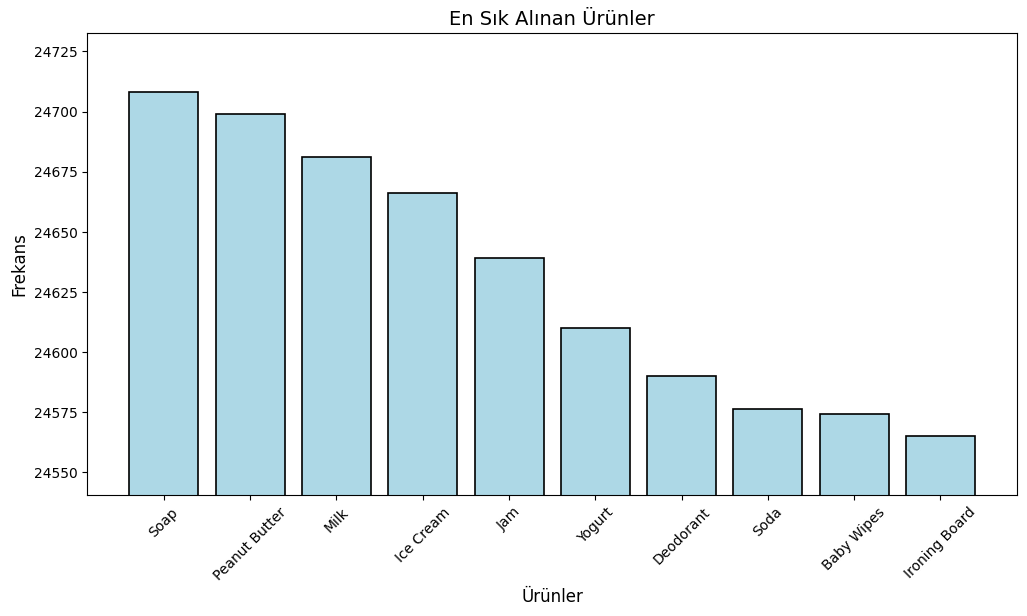

In [12]:
from collections import Counter
from itertools import chain

# Ürünlerin frekansını hesaplama
product_frequencies = Counter(chain.from_iterable(df_cleaned['Normalized_Products']))

# En sık alınan ilk 10 ürünü seçme
most_common_products = product_frequencies.most_common(10)
products, frequencies = zip(*most_common_products)

# Ürünlerin frekansını görselleştirme
plt.figure(figsize=(12, 6))
plt.bar(products, frequencies, color='lightblue', edgecolor='black', linewidth=1.2)
plt.title('En Sık Alınan Ürünler', fontsize=14)
plt.xlabel('Ürünler', fontsize=12)
plt.ylabel('Frekans', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.ylim(min(frequencies) * 0.999, max(frequencies) * 1.001)  # Y ekseni aralığını daha da daraltma
plt.show()

# En sık beraber alınan ürünler


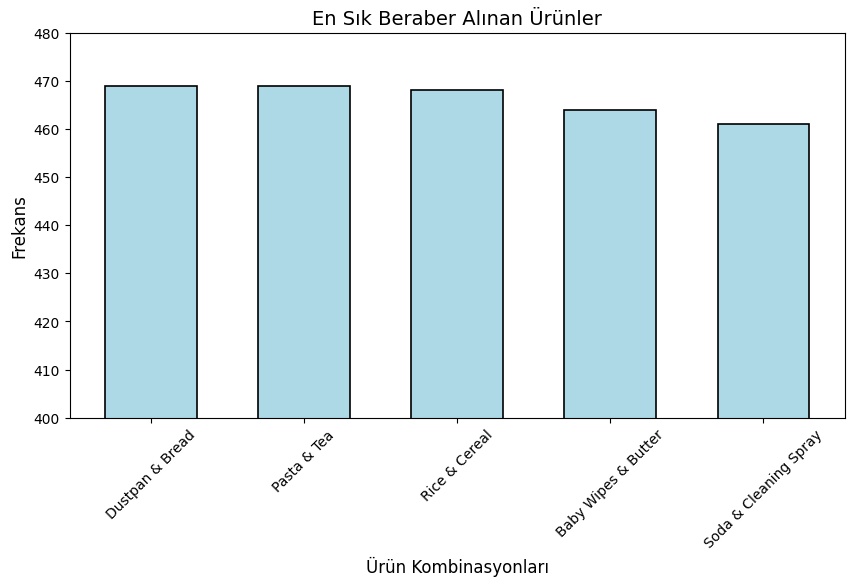

In [ ]:
from itertools import combinations
from collections import Counter
# Ürün kombinasyonlarını hesaplama
product_combinations = []
for products in df_cleaned['Normalized_Products']:
    product_combinations.extend(combinations(products, 2))

# Kombinasyonların frekansını hesaplama
combination_frequencies = Counter(product_combinations)

# En sık beraber alınan ilk 5 ürün kombinasyonunu seçme
most_common_combinations = combination_frequencies.most_common(5)
combinations, frequencies = zip(*most_common_combinations)

# Kombinasyonları daha okunabilir hale getirme
combinations = [f"{combo[0]} & {combo[1]}" for combo in combinations]

# Kombinasyonların frekansını görselleştirme
plt.figure(figsize=(10, 5))
plt.bar(combinations, frequencies, color='lightblue', edgecolor='black', linewidth=1.2, width=0.6)
plt.title('En Sık Beraber Alınan Ürünler', fontsize=14)
plt.xlabel('Ürün Kombinasyonları', fontsize=12)
plt.ylabel('Frekans', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.ylim(400, 480)  # Y eksenini daralt
plt.yticks(fontsize=10)
plt.show()